## Red Wine Quality Dataset
### Introduction
Predicting the Quality of Red Wine using Machine Learning Algorithms for Regression Analysis, Data Visualizations and Data Analysis.

### Description
* Source: UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine+quality)
* Input variables: 
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
* Output variable: quality (score between 0 and 10)
* Dataset characteristics: Multivariate
* Number of observation: 1599
* Number of attribute / variables: 12
* Missing value: N/A


### Installing Libraries

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

### Importing and exploring the dataset

In [364]:
wine = '/Users/maihoang/Downloads/winequality-red.csv'
df = pd.read_csv(wine)

In [365]:
df.head(n=6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [366]:
# Get the summary the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [368]:
# Check if there are any missing values. 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The result shows that dataset doesn't have any missing values

In [369]:
# Rename the modify the dataset header names by removing its 'blank spaces'
df.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df.head(n=6)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Classify The Quality

In [370]:
# Checking the amount of unique values the target feature 'quality' has.
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [371]:
# Analyzing the different values present in the dependent variable(quality column)
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

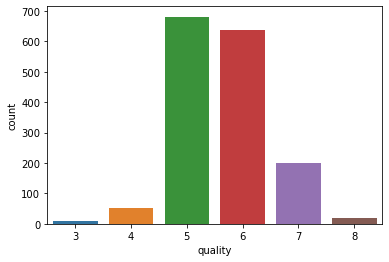

In [372]:
sns.countplot(x='quality', data=df)

The above distribution shows the range for quality is between 3 to 8.
Then we create a new column, categorical response variable/feature ('rating') from existing 'quality' variable.
with  bad: 1-4
      average: 5-6
      good: 7-10

In [373]:
conditions = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating, default='average')
df.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [374]:
df.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


#### Corelation between features/variables:
Check the corelation between the target variable and predictor variables.

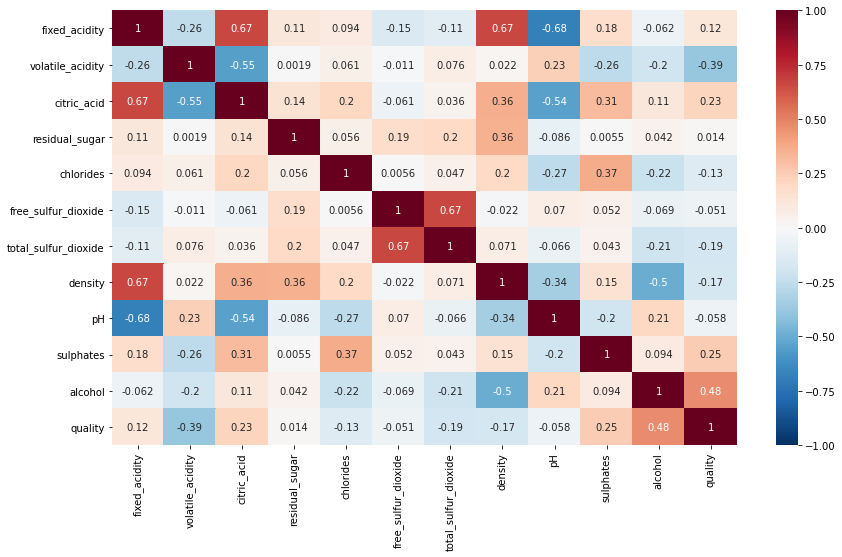

In [375]:
correlation = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [376]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

We can observe that alcohol, volatile_acidity, sulphates, citric_acid, and fixed_acidity have the highest correlation with the response variable 'quality'.
This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 5 variables in our future analysis.
From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weakly with each other.

For the analysis of quality, there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

### Data Visualization
#### Analysis of alcohol percentage with wine quality:

In [377]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


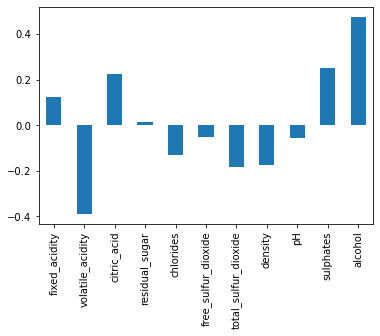

In [378]:
plot_corr = correlations.plot(kind='bar')

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

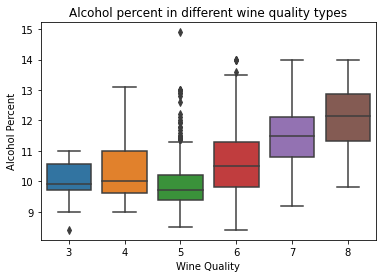

In [379]:
bx = sns.boxplot(x="quality", y='alcohol', data = df)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

#### Analysis of sulphates & wine ratings:

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

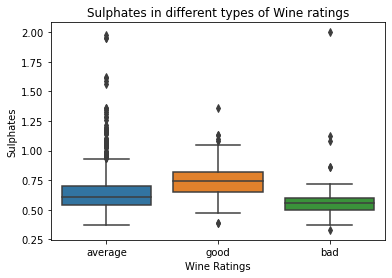

In [380]:
bx = sns.boxplot(x="rating", y='sulphates', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

#### Analysis of Citric Acid & wine ratings:

[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Citric_acid in different types of Wine ratings')]

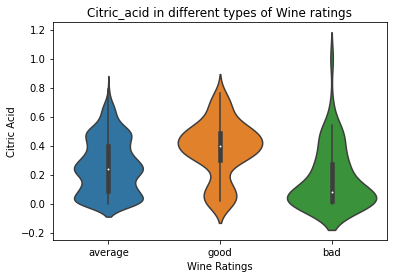

In [381]:
bx = sns.violinplot(x="rating", y='citric_acid', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric_acid in different types of Wine ratings')

#### Analysis of fixed acidity & wine ratings:

[Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

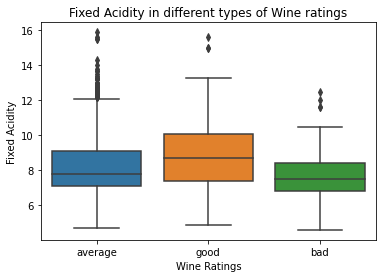

In [382]:
bx = sns.boxplot(x="rating", y='fixed_acidity', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

#### Analysis of pH & wine ratings

[Text(0, 0.5, 'pH'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

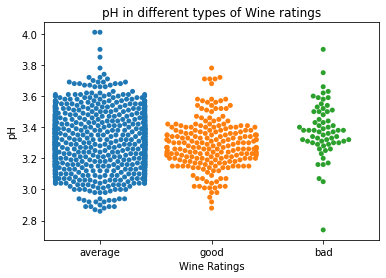

In [383]:
bx = sns.swarmplot(x="rating", y="pH", data = df);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

### Predictive Modeling

#### Data preprocessing
We create another assessment for quality, by splitting into two groups, good and bad. Values 3 through 5 will be considered bad and 6 through 8 will be considered good. 

In [384]:
conditions = [
    (df['quality'] < 6)
]
rating = ['bad']
df['rating'] = np.select(conditions, rating, default='good')
df.rating.value_counts()

good    855
bad     744
Name: rating, dtype: int64

In [394]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#Modelling
#Split data
x=df.iloc[:,:-2] # this -2 removes the column that we added, "rating" and the "quality" column that we're predicting. 
y=df['rating']
print("y:")
print("x:")
print(x.iloc[:10])
lecod=preprocessing.LabelEncoder()  #Encoding Group
y=lecod.fit_transform(y)
print(y[:10])
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state=5)
print("x_train: " + str(len(x_train)) + " x_test: " + str(len(x_test)) + " y_train: " + str(len(y_train)) + " y_test: " + str(len(y_test)))

y:
x:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51  

In [386]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### Classification
We will make a prediction to see if: 

Is it possible to increase the quality of the wine on the market?
If you can control your variables, then can you predict the quality of your wine and obtain more profits?

In [395]:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train, y_train)
pred_rfc = model.predict(x_test)
print(sklearn.metrics.classification_report(y_test, pred_rfc))
print(accuracy_score(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       227
           1       0.84      0.81      0.83       253

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480

0.81875


In [396]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc =svc.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(sklearn.metrics.classification_report(y_test,pred_svc))
print(accuracy_score(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.38      0.49       227
           1       0.61      0.86      0.71       253

    accuracy                           0.63       480
   macro avg       0.66      0.62      0.60       480
weighted avg       0.66      0.63      0.61       480

0.6333333333333333


In [397]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(sklearn.metrics.classification_report(y_test, pred_gbc))
print(accuracy_score(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       227
           1       0.79      0.79      0.79       253

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480

0.78125


In [398]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn=knn.predict(x_test)
print(sklearn.metrics.classification_report(y_test, pred_knn))
print(accuracy_score(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       227
           1       0.68      0.68      0.68       253

    accuracy                           0.66       480
   macro avg       0.66      0.66      0.66       480
weighted avg       0.66      0.66      0.66       480

0.6583333333333333


In [399]:
conclusion = pd.DataFrame({'models': ["Random Forest","SVC","GradientBoosting","KNN"],
                           'accuracies': [ accuracy_score(y_test,pred_rfc), accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_gbc),accuracy_score(y_test,pred_knn)]})
conclusion

,models,accuracies
0,Random Forest,0.818750
1,SVC,0.633333
2,GradientBoosting,0.781250
3,KNN,0.658333


From the results above, we can see that the accuracy matrix for sklearn's random forest classifier model for the prediction of red wine quality value has the best results with about 81% which is far better than the previous models (i.e. SCV, Gradient Boosting or K Neighbors Classifier)

### Conclusion

By using data visualization and prediction modelling, we can observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. 
To make predictions of wine quality and any other if required, we trained four models. As we can see the result that the Random Forest Classifier performed gave the best predictive. The Random Forest Classifier performed marginally better than other models.
The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.

### Relevant publication
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.